# P3: Concevez une application au service de la santé publique

## Mission 

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

## Extrait de l’appel à projets 

Le jeu de données Open Food Facts est disponible sur le site officiel (ou disponible à ce lien en téléchargement). Les variables sont définies à cette adresse.

Les champs sont séparés en quatre sections :

Les informations générales sur la fiche du produit : nom, date de modification, etc.
Un ensemble de tags : catégorie du produit, localisation, origine, etc.
Les ingrédients composant les produits et leurs additifs éventuels.
Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

## 1) Traitement du jeu de données 

### Importation des données 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression

In [2]:
#importation du jeu de données dans une table que nous nommerons data
data=pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t', low_memory=False)

In [3]:
pd.set_option('display.max_columns', 162)
pd.set_option('display.max_rows', 1000)


In [4]:
#création d'une copie
df=data.copy()

In [5]:
print("la taille de la table est: ", df.shape)

la taille de la table est:  (320772, 162)


In [6]:
#affichons les 5 premières lignes de la table 
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [7]:
#affichons les intitulés des colonnes
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

## Nétoyage du jeu de données 


###  Erreurs de type


<AxesSubplot:ylabel='None'>

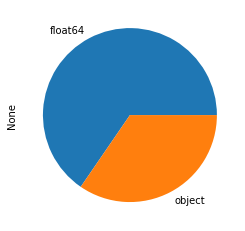

In [8]:
#regardons le type de données sur un graphique
df.dtypes.value_counts().plot.pie()

In [9]:
#le type de données sur une liste
df.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

Tout semble en ordre, mais on peut remarquer que les variables 'created_datetime' et 'last_modified_datetime' ne sont pas considérées comme des dates. On pourra corriger lorsque nous auront besoin de ces informations.

###  Détection des valeurs manquantes

On va ensuite vérifier si notre jeu de données contient des valeurs manquantes :

In [10]:
print("Il y a ",df.isna().sum().sum()," données manquantes dans cette table")

Il y a  39608589  données manquantes dans cette table


<AxesSubplot:>

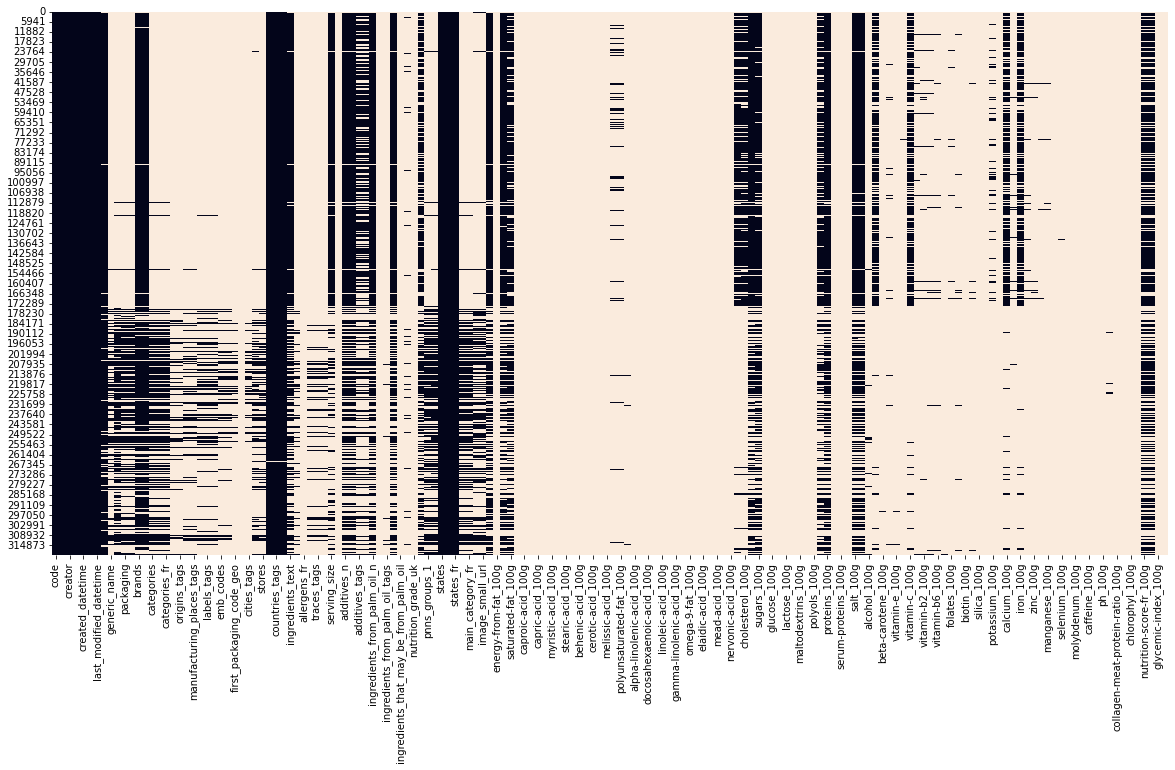

In [11]:
#regardons la répartition des données manquantes sur un garphique
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

On remarque sur le graphique précédent que nous avons dans cette table, plusieurs colonnes vides.

Regardons le pourcentage de valeurs manquantes sur chaque colonnes:

In [12]:
#classement des données manquantes par colonnes
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

last_modified_t                               0.000000
last_modified_datetime                        0.000000
creator                                       0.000006
created_t                                     0.000009
created_datetime                              0.000028
code                                          0.000072
url                                           0.000072
states                                        0.000143
states_tags                                   0.000143
states_fr                                     0.000143
countries_fr                                  0.000873
countries                                     0.000873
countries_tags                                0.000873
product_name                                  0.055373
brands                                        0.088574
brands_tags                                   0.088599
energy_100g                                   0.185986
proteins_100g                                 0.189699
salt_100g 

On peut confirmer que nous avons des colonnes qui ne contiennent aucune valeur. On déside de supprimer dans un premier temps les colonnes qui ont plus de 75% de valeurs manquantes. 

In [13]:
#On conserve les colonnes qui sont remplies au min à 75%
df_s=df[df.columns[df.isna().sum()/df.shape[0] <0.75]]
df_s.shape

(320772, 50)

In [14]:
df.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

<AxesSubplot:>

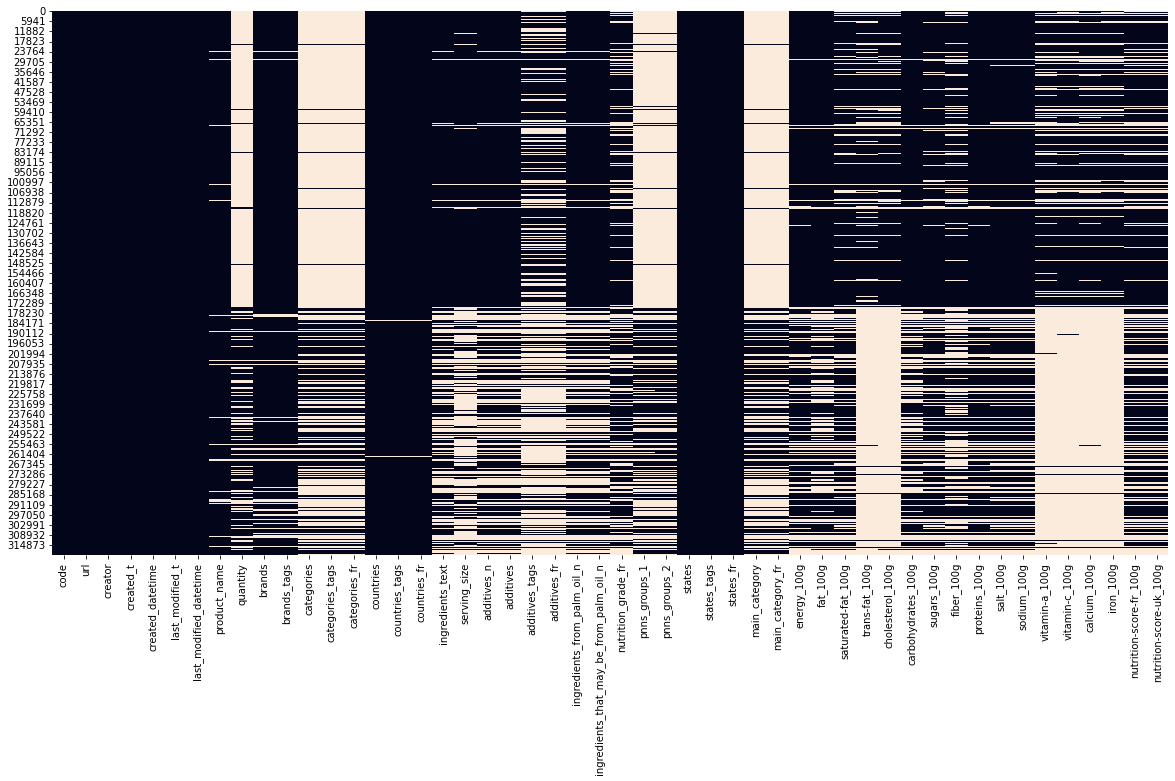

In [15]:
#On peut observer la nouvelle répartition des données manquantes
plt.figure(figsize=(20,10))
sns.heatmap(df_s.isna(), cbar=False)

In [16]:
#Observons la liste des colonnes restants
df_s.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',
 'main_category',
 'main_category_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

### Sélection de variables pertinentes pouvant aider dans la recherche d'une idée d'application  

In [17]:
#les variables à selectionner
variables=['code','product_name','countries_fr', 'pnns_groups_1',
 'pnns_groups_2','energy_100g', 'fat_100g', 'saturated-fat_100g',
         'carbohydrates_100g','sugars_100g', 'fiber_100g', 'proteins_100g',
         'salt_100g','sodium_100g',  'nutrition-score-fr_100g','nutrition_grade_fr','additives_n','additives_tags','ingredients_from_palm_oil_n']

In [18]:
#selection des variables pertinentes 
df_var=df_s[variables]
df_var.head()

,code,product_name,countries_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr,additives_n,additives_tags,ingredients_from_palm_oil_n
0,0000000003087,Farine de blé noir,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,Banana Chips Sweetened (Whole),États-Unis,NaN,NaN,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,d,0.0,NaN,0.0
2,0000000004559,Peanuts,États-Unis,NaN,NaN,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,b,0.0,NaN,0.0
3,0000000016087,Organic Salted Nut Mix,États-Unis,NaN,NaN,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,d,0.0,NaN,0.0
4,0000000016094,Organic Polenta,États-Unis,NaN,NaN,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,0.0,NaN,0.0


In [19]:
#la taille du nouveau dataframe
df_var.shape

(320772, 19)

Le jeu de données contient plusieurs porduits américains. Nous pouvons sélectionner les produits vendus en France pour notre analyse. 

In [20]:
#selection des produits français 
df_var=df_var.loc[(df_var['countries_fr']== 'France'),:]
df_var.head(50)

,code,product_name,countries_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr,additives_n,additives_tags,ingredients_from_palm_oil_n
0,0000000003087,Farine de blé noir,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,Filet de bœuf,France,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,Twix x2,France,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,0000005200016,lentilles vertes,France,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
183,0000007020254,NaN,France,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,0000007730009,Biscuits sablés fourrage au cacao,France,Sugary snacks,Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,"en:e1400,en:e322,en:e503",0.0
187,0000009336247,NaN,France,Sugary snacks,Sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,0000010090206,Thé de Noël aromatisé orange-cannelle,France,Beverages,Non-sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
189,0000010127735,Sirops pour ganache macarons,France,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,"en:e330,en:e171,en:e211,en:e131",0.0


In [21]:
df_var.shape

(94392, 19)

le jeu de donnée comprend également des produits qui n'ont pas beaucoup de variables définies. Nous pouvons supprimer ces lignes qui comprennent plus de 10 valeurs quantitatives nuls: les produits qui n'ont aucun indicateur quantitatif

In [22]:
#regardons les produits pour lesquels nous n'avons pas baucoup de variables:
print(df_var.isnull().sum(axis=1))

0         16
46        14
48        17
136       14
182       12
          ..
320761    15
320763     1
320764    16
320765    12
320770    16
Length: 94392, dtype: int64


In [23]:
#suppression des lignes qui comprennent plus de 10 valeurs quantitatives nuls: les produits qui n'ont aucun indicateur quantitatif 
table=df_var.dropna(thresh=df_var.shape[1]-9)
table.head(50)

,code,product_name,countries_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr,additives_n,additives_tags,ingredients_from_palm_oil_n
190,0000010187319,Mini Confettis,France,NaN,NaN,1753.0,NaN,0.8,NaN,87.7,0.9,0.6,0.01000,0.003937,14.0,d,NaN,NaN,NaN
191,0000010207260,Praliné Amande Et Noisette,France,NaN,NaN,2406.0,NaN,2.9,NaN,50.3,3.9,9.5,0.00300,0.001181,14.0,d,NaN,NaN,NaN
226,0000040608754,"Pepsi, Nouveau goût !",France,Beverages,Sweetened beverages,177.0,0.00,0.0,10.40,10.4,0.0,0.0,0.02540,0.010000,13.0,e,2.0,"en:e150d,en:e338",0.0
234,0000069161025,Tarte Poireaux Et Lardons,France,NaN,NaN,1079.0,NaN,11.0,NaN,1.0,1.4,7.5,0.80000,0.314961,15.0,d,NaN,NaN,NaN
240,0000087177756,7Up,France,Beverages,Sweetened beverages,177.0,0.00,0.0,10.40,10.4,NaN,0.0,0.10000,0.039370,13.0,e,3.0,"en:e330,en:e296,en:e331",0.0
242,000010,Madeleines nature,France,Sugary snacks,Biscuits and cakes,1900.0,23.00,2.5,55.00,26.0,1.5,6.0,0.66000,0.259843,12.0,d,5.0,"en:e422,en:e503,en:e500,en:e450,en:e471",0.0
279,000030,Cakes Raisins,France,Sugary snacks,Biscuits and cakes,1768.0,19.00,2.5,56.00,28.0,1.8,5.8,0.65000,0.255906,13.0,d,5.0,"en:e422,en:e503,en:e500,en:e450,en:e471",0.0
283,000031,Cakes aux Fruits,France,Sugary snacks,Biscuits and cakes,1670.0,15.00,2.0,60.00,34.0,1.5,4.9,0.60000,0.236220,12.0,d,11.0,"en:e202,en:e220,en:e150a,en:e120,en:e133,en:e3...",0.0
299,000050,Financiers aux Amandes,France,Sugary snacks,Biscuits and cakes,1868.0,23.00,10.0,51.00,39.0,1.7,8.0,0.55000,0.216535,22.0,e,3.0,"en:e422,en:e500,en:e450",0.0
301,000051,Fondants Citron,France,Sugary snacks,Biscuits and cakes,1896.0,24.00,10.0,50.00,37.0,2.5,8.1,0.78000,0.307087,22.0,e,8.0,"en:e401,en:e330,en:e332,en:e341,en:e100,en:e42...",0.0


In [24]:
table.shape

(61322, 19)

### les doublons 

In [25]:
#vérifions les doublons
table.loc[table[['code','product_name']].duplicated(keep=False),:]

,code,product_name,countries_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr,additives_n,additives_tags,ingredients_from_palm_oil_n


Nous n'avons détecté aucun doublon dans notre jeu de données

### les valeurs aberrantes

Interessons nous aux valeurs des variables quantitatives pour detecter les éventuelles outliers

In [26]:
#les variables quantitatives les plus pertinantes:

quant_variables = [ 'energy_100g', 'fat_100g', 'saturated-fat_100g',
         'carbohydrates_100g','sugars_100g', 'fiber_100g', 'proteins_100g',
         'salt_100g','sodium_100g',  'nutrition-score-fr_100g','additives_n','ingredients_from_palm_oil_n']

Nous pouvons afficher les boxplots des variables quantitatives

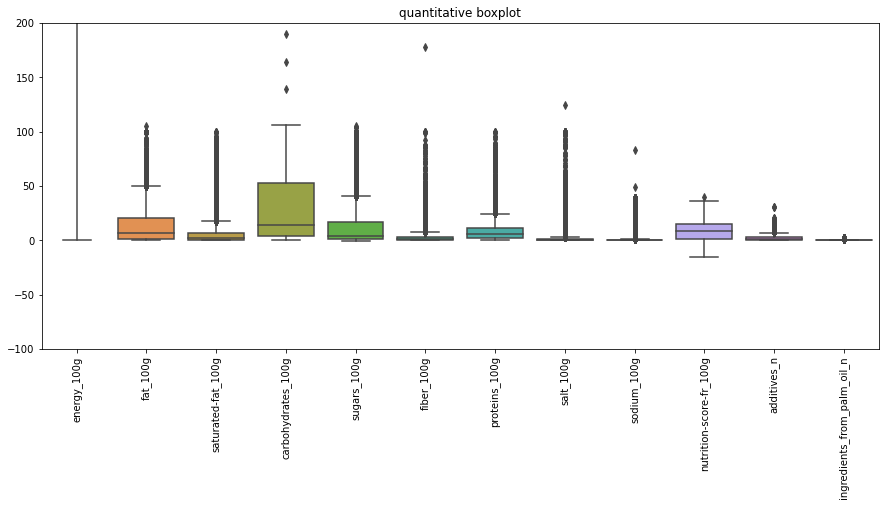

In [27]:
#affichons les boxplots de ces variables 
fig = plt.figure(figsize=(15, 6))
ax = plt.axes()
degrees = 90
ax.set_ylim([-1e2,2e2])
plt.xticks(rotation=degrees)
sns.boxplot(data=table[quant_variables]).set_title('quantitative boxplot');

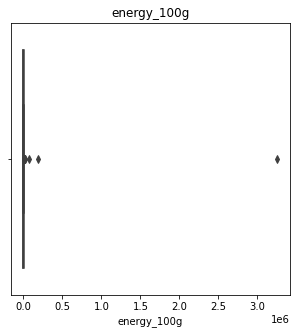

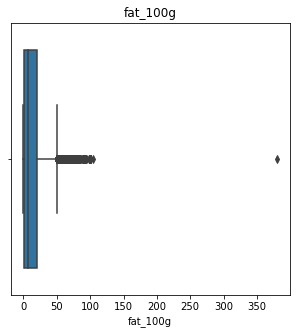

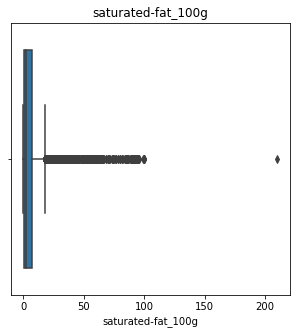

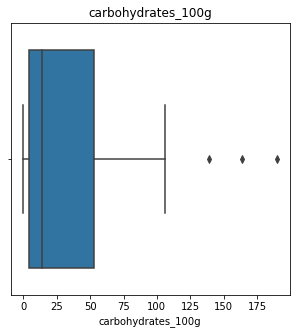

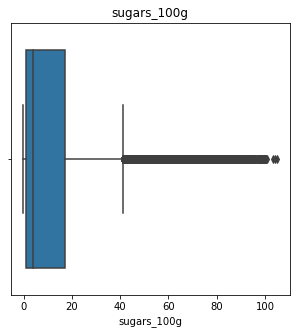

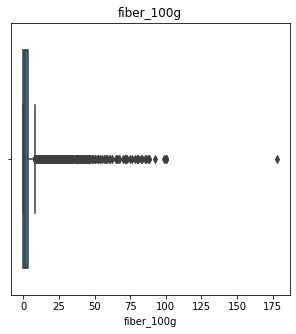

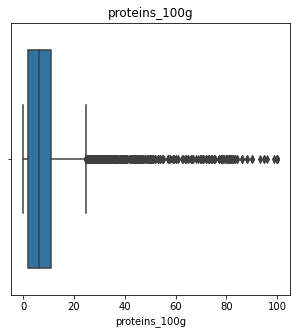

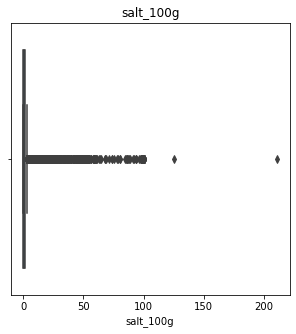

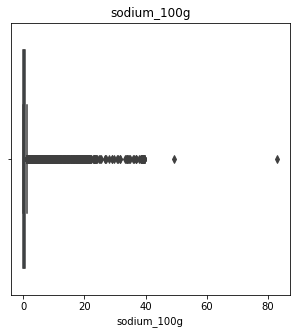

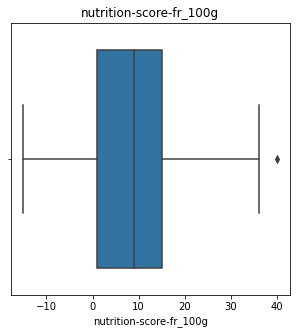

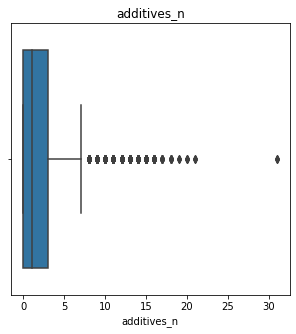

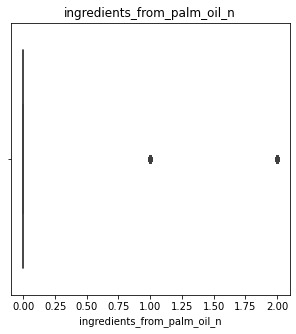

In [28]:
for var in quant_variables:
    plt.figure(figsize=(5,5));
    sns.boxplot(x=table[var]).set_title(var)

Observons quelques indicateurs statistiques de ces variables.

In [29]:
for var in quant_variables:
    print(table[var].describe());

count    6.123100e+04
mean     1.168861e+03
std      1.318224e+04
min      0.000000e+00
25%      4.270000e+02
50%      1.028000e+03
75%      1.640000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64
count    44114.000000
mean        13.160120
std         16.933542
min          0.000000
25%          1.300000
50%          6.600000
75%         20.800000
max        380.000000
Name: fat_100g, dtype: float64
count    59386.000000
mean         5.386271
std          8.538774
min          0.000000
25%          0.300000
50%          1.900000
75%          7.300000
max        210.000000
Name: saturated-fat_100g, dtype: float64
count    44073.000000
mean        27.305181
std         27.297019
min          0.000000
25%          4.000000
50%         14.000000
75%         52.600000
max        190.000000
Name: carbohydrates_100g, dtype: float64
count    59414.000000
mean        13.193067
std         18.985286
min         -0.100000
25%          1.000000
50%          4.000000
75%         17.00

#### Suppression des valeurs abérrantes des variables 0-100g
On remarque que certaines variables devraient avoir des valeurs comprises entre 0 et 100g. On peut supprimer les données qui ne sont pas dans cet intervalle

In [30]:
variables_100g=[ 'fat_100g', 'saturated-fat_100g',
         'carbohydrates_100g','sugars_100g', 'fiber_100g', 'proteins_100g',
         'salt_100g','sodium_100g',  'nutrition-score-fr_100g']

In [31]:
#detection  et suppression des valeurs abérantes dans les données entre 0 et 100g
for var in variables_100g:
    table.drop(table.loc[(table[var]<0)|(table[var]>100),:].index, inplace=True)
    

C:\Users\mr_ar\AppData\Local\Temp\ipykernel_16576\950334174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table.drop(table.loc[(table[var]<0)|(table[var]>100),:].index, inplace=True)


In [32]:
table.shape

(51454, 19)

####   Suppression des valeurs aberrantes de la colonne 'énergie' par la méthode interquartile


In [33]:

q1=table['energy_100g'].quantile(q=0.25)
q3=table['energy_100g'].quantile(q=0.75)

IQR=q3-q1
borne_inf = q1-1.5*IQR

borne_sup = q3 +1.5*IQR

table= table[table['energy_100g']<borne_sup]
table=table[table['energy_100g']>borne_inf]

In [34]:
table.shape

(50906, 19)

In [35]:
for var in quant_variables:
    print(table[var].describe());

count    50906.000000
mean      1161.766665
std        754.778081
min          0.000000
25%        491.000000
50%       1090.000000
75%       1730.000000
max       3636.000000
Name: energy_100g, dtype: float64
count    36356.000000
mean        14.653300
std         16.174897
min          0.000000
25%          2.000000
50%          9.500000
75%         23.000000
max        100.000000
Name: fat_100g, dtype: float64
count    49038.000000
mean         6.237256
std          8.727054
min          0.000000
25%          0.500000
50%          2.700000
75%          9.000000
max        100.000000
Name: saturated-fat_100g, dtype: float64
count    36311.000000
mean        27.739131
std         27.282144
min          0.000000
25%          3.700000
50%         15.000000
75%         53.000000
max        100.000000
Name: carbohydrates_100g, dtype: float64
count    49085.000000
mean        15.136763
std         20.167065
min          0.000000
25%          1.000000
50%          5.000000
75%         23.50

## Traitement des valeurs manquantes

In [36]:
# Regardons de nouveau le pourcentage de valeurs manquantes par colonnes:
table.isna().sum()/table.shape[0]

code                           0.000000
product_name                   0.005049
countries_fr                   0.000000
pnns_groups_1                  0.230543
pnns_groups_2                  0.228500
energy_100g                    0.000000
fat_100g                       0.285821
saturated-fat_100g             0.036695
carbohydrates_100g             0.286705
sugars_100g                    0.035772
fiber_100g                     0.325325
proteins_100g                  0.003673
salt_100g                      0.034888
sodium_100g                    0.034907
nutrition-score-fr_100g        0.054119
nutrition_grade_fr             0.054119
additives_n                    0.333556
additives_tags                 0.553294
ingredients_from_palm_oil_n    0.333556
dtype: float64

In [37]:
df_new=table.copy()

#### Suppression des produits dont le nom n'est pas renseigné

In [38]:
#Suppression des produits qui n'ont pas leur nom renseigné
df_new=df_new.dropna(subset=['product_name'])

In [39]:
df_new.isna().sum()/df_new.shape[0]

code                           0.000000
product_name                   0.000000
countries_fr                   0.000000
pnns_groups_1                  0.231693
pnns_groups_2                  0.229659
energy_100g                    0.000000
fat_100g                       0.286995
saturated-fat_100g             0.036763
carbohydrates_100g             0.287844
sugars_100g                    0.035934
fiber_100g                     0.324666
proteins_100g                  0.003692
salt_100g                      0.035006
sodium_100g                    0.035025
nutrition-score-fr_100g        0.054216
nutrition_grade_fr             0.054216
additives_n                    0.330589
additives_tags                 0.551265
ingredients_from_palm_oil_n    0.330589
dtype: float64

In [40]:
df_new.head()

,code,product_name,countries_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr,additives_n,additives_tags,ingredients_from_palm_oil_n
190,0000010187319,Mini Confettis,France,NaN,NaN,1753.0,NaN,0.8,NaN,87.7,0.9,0.6,0.0100,0.003937,14.0,d,NaN,NaN,NaN
191,0000010207260,Praliné Amande Et Noisette,France,NaN,NaN,2406.0,NaN,2.9,NaN,50.3,3.9,9.5,0.0030,0.001181,14.0,d,NaN,NaN,NaN
226,0000040608754,"Pepsi, Nouveau goût !",France,Beverages,Sweetened beverages,177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,0.010000,13.0,e,2.0,"en:e150d,en:e338",0.0
234,0000069161025,Tarte Poireaux Et Lardons,France,NaN,NaN,1079.0,NaN,11.0,NaN,1.0,1.4,7.5,0.8000,0.314961,15.0,d,NaN,NaN,NaN
240,0000087177756,7Up,France,Beverages,Sweetened beverages,177.0,0.0,0.0,10.4,10.4,NaN,0.0,0.1000,0.039370,13.0,e,3.0,"en:e330,en:e296,en:e331",0.0


### Remplacement des valeurs manquantes par 0

In [41]:
#remplacons les données manquantes des colonnes 'salt_100g','proteins_100g'et 'sodium_100g', par 0
liste=['salt_100g','sodium_100g','ingredients_from_palm_oil_n','additives_n']
for i in liste:
    df_new[i]=df_new[i].replace(np.nan, 0)

In [42]:
df_new.isna().sum()/df_new.shape[0]

code                           0.000000
product_name                   0.000000
countries_fr                   0.000000
pnns_groups_1                  0.231693
pnns_groups_2                  0.229659
energy_100g                    0.000000
fat_100g                       0.286995
saturated-fat_100g             0.036763
carbohydrates_100g             0.287844
sugars_100g                    0.035934
fiber_100g                     0.324666
proteins_100g                  0.003692
salt_100g                      0.000000
sodium_100g                    0.000000
nutrition-score-fr_100g        0.054216
nutrition_grade_fr             0.054216
additives_n                    0.000000
additives_tags                 0.551265
ingredients_from_palm_oil_n    0.000000
dtype: float64

### Remplacement des valeurs manquantes avec la methode iterative imputer

Avant d'appliquer cette methode, nous devons verifier la corélation entre les variables

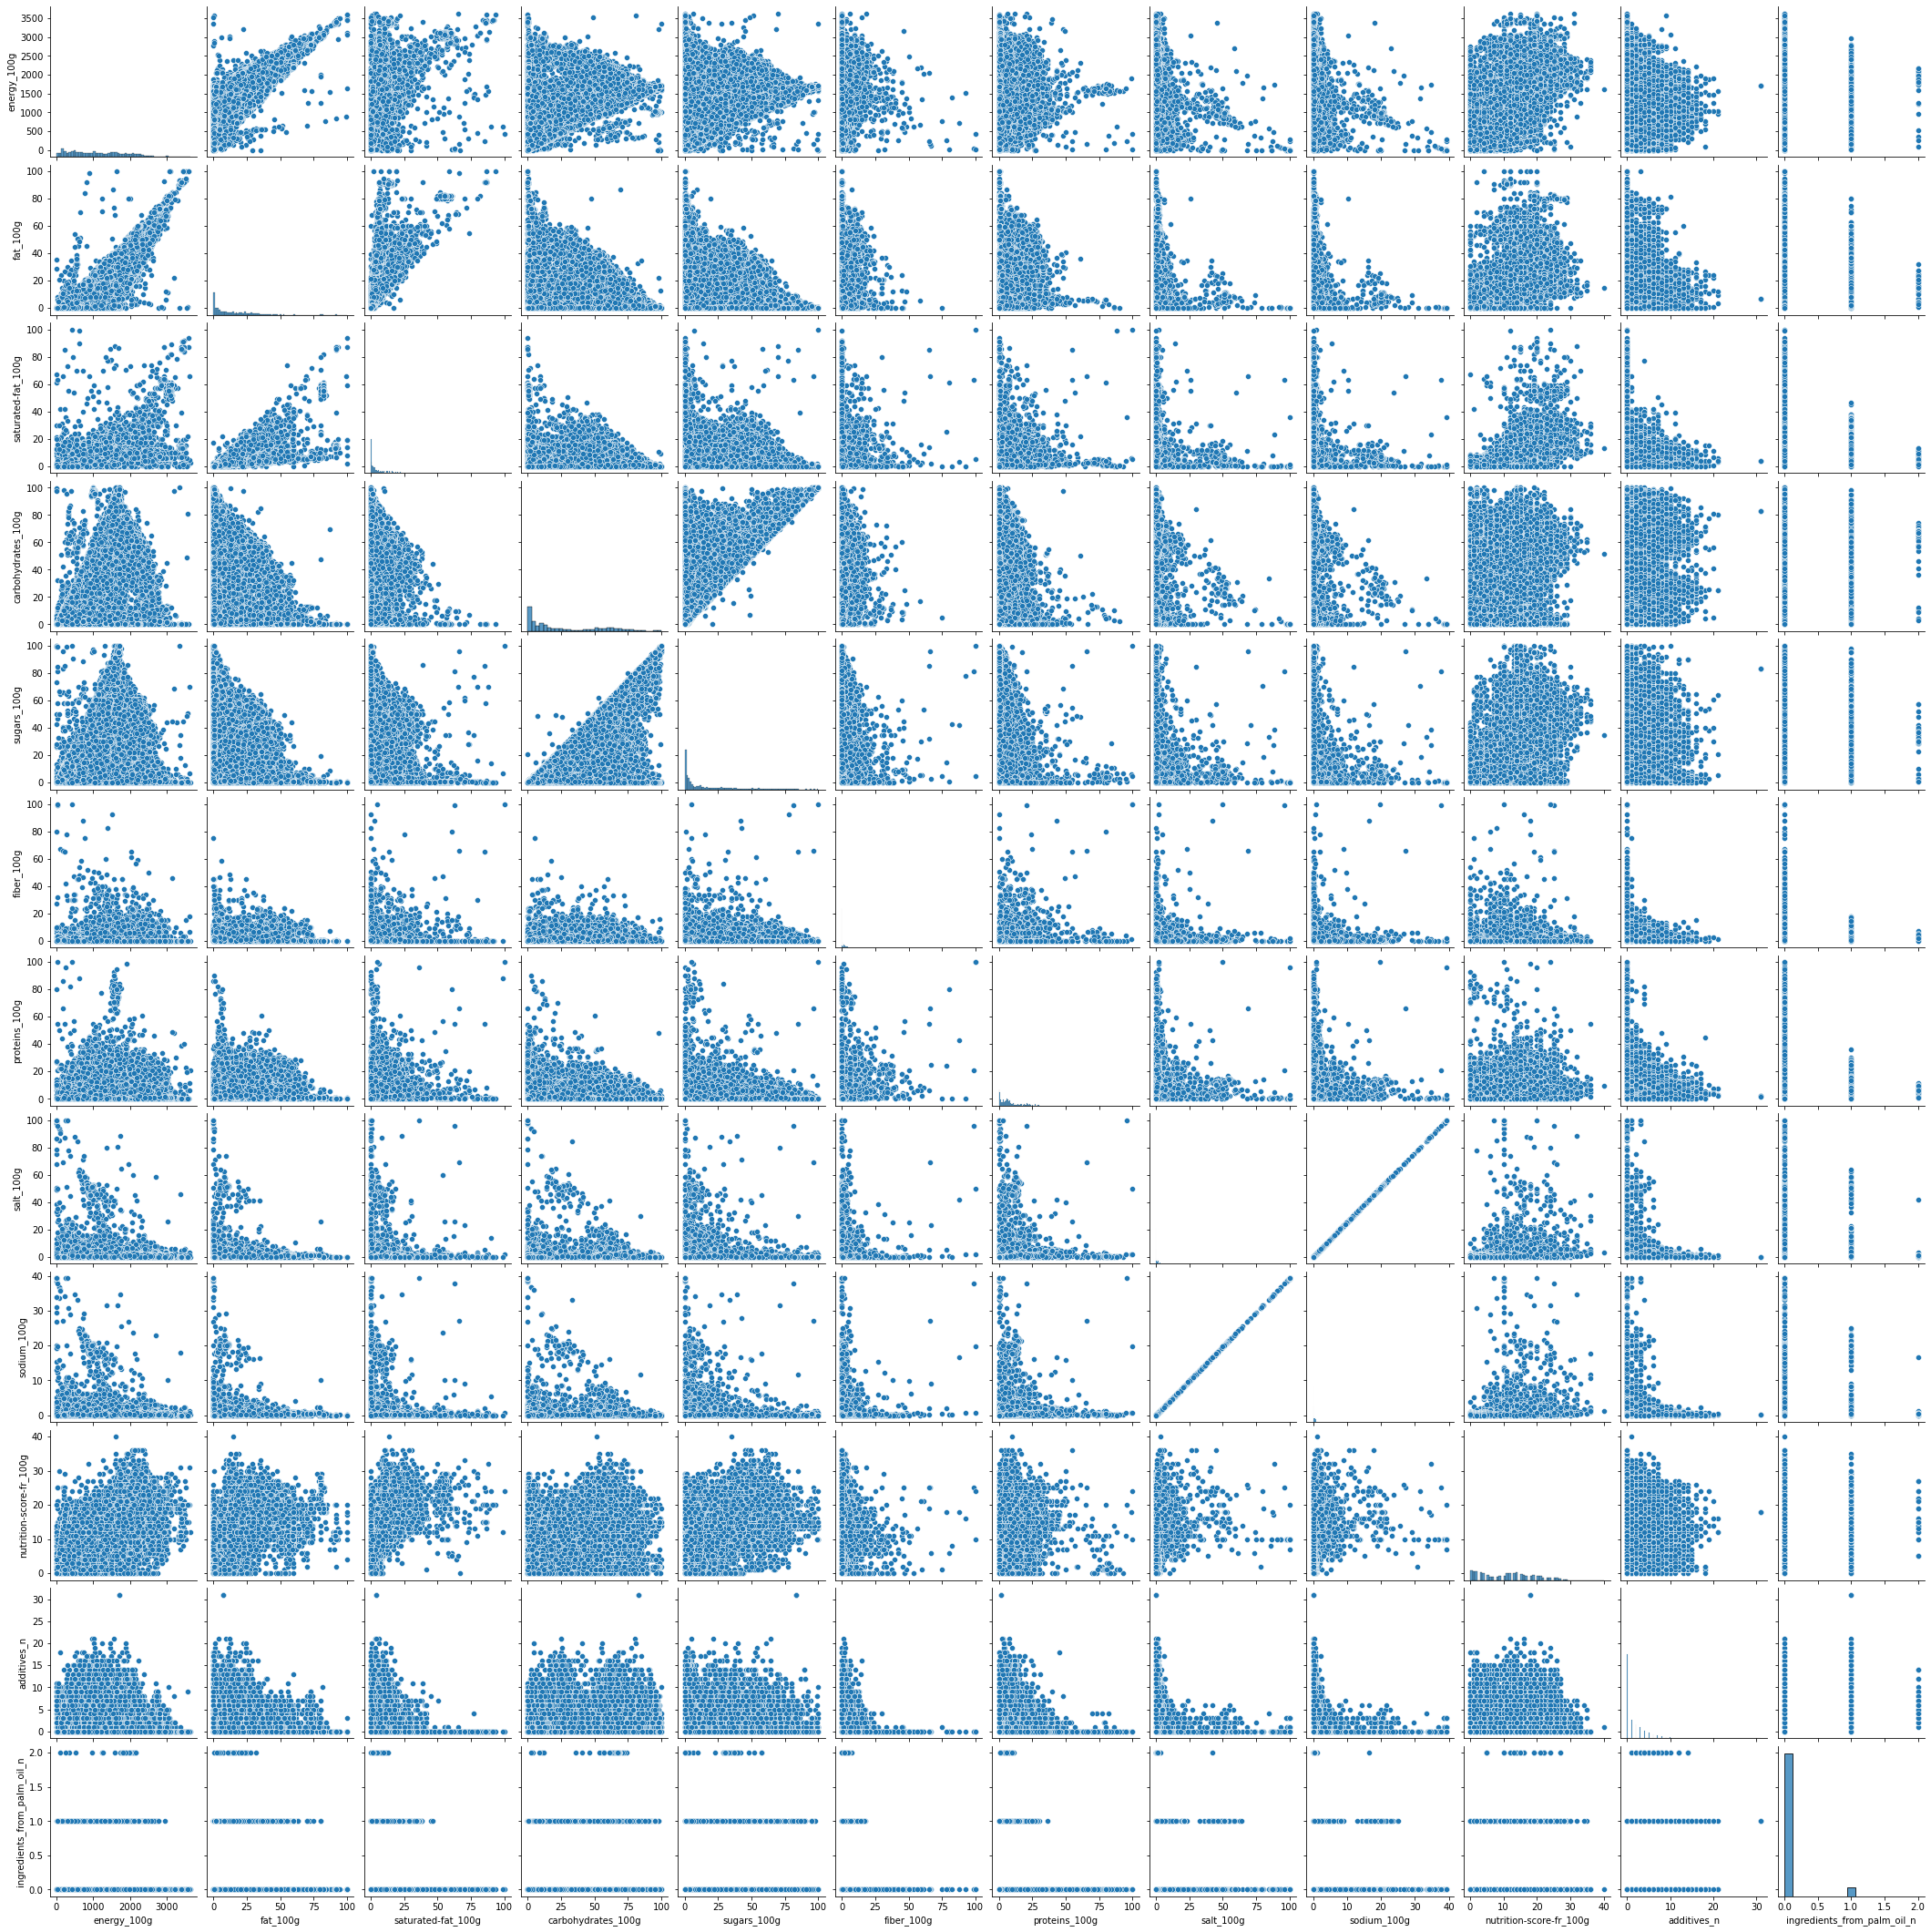

In [43]:
#visualisons les relations entre les variables
sns.pairplot(df_new[quant_variables])

voyons de plus prèt la corélation entre ces variables à l'aide d'une matrice

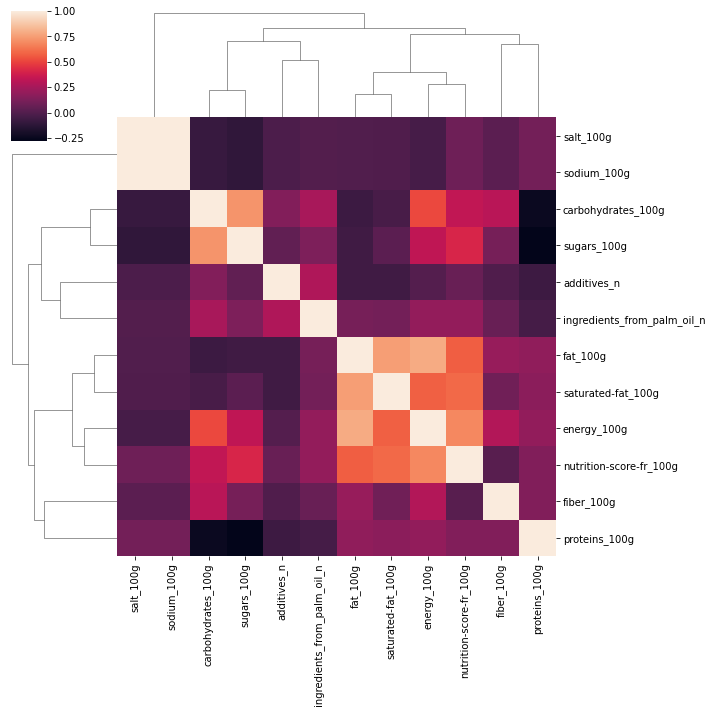

In [44]:
sns.clustermap(df_new[quant_variables].corr())

On peut remarquer que les variables 'sugar'et'carbohydrates', 'energy','fiber' et 'proteins_100g', 'fat' et 'saturated_fat' sont corrélées entre elles. On peut remplire les valeurs manquantes avec la methode iterative imputer

In [45]:
va=['energy_100g', 'fat_100g', 'saturated-fat_100g','carbohydrates_100g','sugars_100g', 'fiber_100g','proteins_100g']
imputer = IterativeImputer(tol=1e-1, min_value=0,max_value=100, imputation_order= 'roman' )
df_imp=imputer.fit_transform(df_new[va])
df_imp=pd.DataFrame(df_imp,columns=va)
df_imp.head()


,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g
0,1753.0,29.517397,0.8,42.989658,87.7,0.900000,0.6
1,2406.0,43.060869,2.9,39.416274,50.3,3.900000,9.5
2,177.0,0.000000,0.0,10.400000,10.4,0.000000,0.0
3,1079.0,14.224571,11.0,23.938321,1.0,1.400000,7.5
4,177.0,0.000000,0.0,10.400000,10.4,0.331246,0.0


### Remplacement des valeurs manquantes par la methode du knn imputer

In [46]:
#traitons les valeurs manquantes de la variable nutrition_score' à l'aide du knn imputer
vaknn=['nutrition-score-fr_100g']
imputer = KNNImputer(n_neighbors=2)
df_knn=imputer.fit_transform(df_new[vaknn])
df_knn=pd.DataFrame(df_knn,columns=vaknn)
df_knn.head()

,nutrition-score-fr_100g
0,14.0
1,14.0
2,13.0
3,15.0
4,13.0


In [47]:
df_new.head(50)

,code,product_name,countries_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr,additives_n,additives_tags,ingredients_from_palm_oil_n
190,0000010187319,Mini Confettis,France,NaN,NaN,1753.0,NaN,0.8,NaN,87.7,0.9,0.6,0.01000,0.003937,14.0,d,0.0,NaN,0.0
191,0000010207260,Praliné Amande Et Noisette,France,NaN,NaN,2406.0,NaN,2.9,NaN,50.3,3.9,9.5,0.00300,0.001181,14.0,d,0.0,NaN,0.0
226,0000040608754,"Pepsi, Nouveau goût !",France,Beverages,Sweetened beverages,177.0,0.00,0.0,10.40,10.4,0.0,0.0,0.02540,0.010000,13.0,e,2.0,"en:e150d,en:e338",0.0
234,0000069161025,Tarte Poireaux Et Lardons,France,NaN,NaN,1079.0,NaN,11.0,NaN,1.0,1.4,7.5,0.80000,0.314961,15.0,d,0.0,NaN,0.0
240,0000087177756,7Up,France,Beverages,Sweetened beverages,177.0,0.00,0.0,10.40,10.4,NaN,0.0,0.10000,0.039370,13.0,e,3.0,"en:e330,en:e296,en:e331",0.0
242,000010,Madeleines nature,France,Sugary snacks,Biscuits and cakes,1900.0,23.00,2.5,55.00,26.0,1.5,6.0,0.66000,0.259843,12.0,d,5.0,"en:e422,en:e503,en:e500,en:e450,en:e471",0.0
279,000030,Cakes Raisins,France,Sugary snacks,Biscuits and cakes,1768.0,19.00,2.5,56.00,28.0,1.8,5.8,0.65000,0.255906,13.0,d,5.0,"en:e422,en:e503,en:e500,en:e450,en:e471",0.0
283,000031,Cakes aux Fruits,France,Sugary snacks,Biscuits and cakes,1670.0,15.00,2.0,60.00,34.0,1.5,4.9,0.60000,0.236220,12.0,d,11.0,"en:e202,en:e220,en:e150a,en:e120,en:e133,en:e3...",0.0
299,000050,Financiers aux Amandes,France,Sugary snacks,Biscuits and cakes,1868.0,23.00,10.0,51.00,39.0,1.7,8.0,0.55000,0.216535,22.0,e,3.0,"en:e422,en:e500,en:e450",0.0
301,000051,Fondants Citron,France,Sugary snacks,Biscuits and cakes,1896.0,24.00,10.0,50.00,37.0,2.5,8.1,0.78000,0.307087,22.0,e,8.0,"en:e401,en:e330,en:e332,en:e341,en:e100,en:e42...",0.0


### Remplacement des valeurs manquantes des variables qualitatives 

In [48]:
#traitons les valeurs manquantes des variables qualitatives 'pnns_groups_1'et'pnns_groups_2':
quali_var=['pnns_groups_1','pnns_groups_2']
df_quali=df_new[quali_var]

In [49]:
df_quali= df_quali.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_quali

,pnns_groups_1,pnns_groups_2
190,Sugary snacks,unknown
191,Sugary snacks,unknown
226,Beverages,Sweetened beverages
234,Sugary snacks,unknown
240,Beverages,Sweetened beverages
...,...,...
320702,Sugary snacks,Sweets
320740,Sugary snacks,unknown
320741,Sugary snacks,unknown
320757,Sugary snacks,unknown


In [50]:
#remplaçons les données manquantes de la colonne 'additives_tags' par 'unknown'
df_new['additives_tags']=df_new['additives_tags'].fillna('unknown')


In [51]:
df_new['nutrition_grade_fr']=df_new['nutrition_grade_fr'].fillna('unknown')

In [52]:
df_new.head(20)

,code,product_name,countries_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr,additives_n,additives_tags,ingredients_from_palm_oil_n
190,0000010187319,Mini Confettis,France,NaN,NaN,1753.0,NaN,0.8,NaN,87.7,0.9,0.6,0.0100,0.003937,14.0,d,0.0,unknown,0.0
191,0000010207260,Praliné Amande Et Noisette,France,NaN,NaN,2406.0,NaN,2.9,NaN,50.3,3.9,9.5,0.0030,0.001181,14.0,d,0.0,unknown,0.0
226,0000040608754,"Pepsi, Nouveau goût !",France,Beverages,Sweetened beverages,177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,0.010000,13.0,e,2.0,"en:e150d,en:e338",0.0
234,0000069161025,Tarte Poireaux Et Lardons,France,NaN,NaN,1079.0,NaN,11.0,NaN,1.0,1.4,7.5,0.8000,0.314961,15.0,d,0.0,unknown,0.0
240,0000087177756,7Up,France,Beverages,Sweetened beverages,177.0,0.0,0.0,10.4,10.4,NaN,0.0,0.1000,0.039370,13.0,e,3.0,"en:e330,en:e296,en:e331",0.0
242,000010,Madeleines nature,France,Sugary snacks,Biscuits and cakes,1900.0,23.0,2.5,55.0,26.0,1.5,6.0,0.6600,0.259843,12.0,d,5.0,"en:e422,en:e503,en:e500,en:e450,en:e471",0.0
279,000030,Cakes Raisins,France,Sugary snacks,Biscuits and cakes,1768.0,19.0,2.5,56.0,28.0,1.8,5.8,0.6500,0.255906,13.0,d,5.0,"en:e422,en:e503,en:e500,en:e450,en:e471",0.0
283,000031,Cakes aux Fruits,France,Sugary snacks,Biscuits and cakes,1670.0,15.0,2.0,60.0,34.0,1.5,4.9,0.6000,0.236220,12.0,d,11.0,"en:e202,en:e220,en:e150a,en:e120,en:e133,en:e3...",0.0
299,000050,Financiers aux Amandes,France,Sugary snacks,Biscuits and cakes,1868.0,23.0,10.0,51.0,39.0,1.7,8.0,0.5500,0.216535,22.0,e,3.0,"en:e422,en:e500,en:e450",0.0
301,000051,Fondants Citron,France,Sugary snacks,Biscuits and cakes,1896.0,24.0,10.0,50.0,37.0,2.5,8.1,0.7800,0.307087,22.0,e,8.0,"en:e401,en:e330,en:e332,en:e341,en:e100,en:e42...",0.0


In [53]:
variables_new=['product_name','salt_100g','sodium_100g','additives_tags','nutrition_grade_fr','ingredients_from_palm_oil_n','additives_n']
df_variable=df_new[variables_new]

In [54]:
print(df_variable.shape)
print(df_imp.shape)
print(df_knn.shape)
print(df_quali.shape)

(50649, 7)
(50649, 7)
(50649, 1)
(50649, 2)


### jointure

In [55]:
df_clean= pd.concat(objs=[df_variable.reset_index(drop=True),df_quali.reset_index(drop=True), df_imp.reset_index(drop=True), df_knn.reset_index(drop=True)], axis=1)
df_clean.shape

(50649, 17)

In [56]:
df_clean.head()

,product_name,salt_100g,sodium_100g,additives_tags,nutrition_grade_fr,ingredients_from_palm_oil_n,additives_n,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g
0,Mini Confettis,0.0100,0.003937,unknown,d,0.0,0.0,Sugary snacks,unknown,1753.0,29.517397,0.8,42.989658,87.7,0.900000,0.6,14.0
1,Praliné Amande Et Noisette,0.0030,0.001181,unknown,d,0.0,0.0,Sugary snacks,unknown,2406.0,43.060869,2.9,39.416274,50.3,3.900000,9.5,14.0
2,"Pepsi, Nouveau goût !",0.0254,0.010000,"en:e150d,en:e338",e,0.0,2.0,Beverages,Sweetened beverages,177.0,0.000000,0.0,10.400000,10.4,0.000000,0.0,13.0
3,Tarte Poireaux Et Lardons,0.8000,0.314961,unknown,d,0.0,0.0,Sugary snacks,unknown,1079.0,14.224571,11.0,23.938321,1.0,1.400000,7.5,15.0
4,7Up,0.1000,0.039370,"en:e330,en:e296,en:e331",e,0.0,3.0,Beverages,Sweetened beverages,177.0,0.000000,0.0,10.400000,10.4,0.331246,0.0,13.0


Exportons la nouvelle table

In [57]:
df_clean_data=df_clean.to_csv('df_clean.csv', index=False)